## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [2]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [3]:
df = pd.read_csv('cardiac_all_psm_open.csv')

In [4]:
df.shape

(45253, 37)

In [5]:
df.head()

personid                           encounterid  \
0  03d13c92-13eb-41e9-8cea-f1d04dd95563  735e3d4b-492d-4d6e-8faa-283e27c8b24a   
1  05c3757c-afff-402a-9c59-de47288b17ea  8776209b-6f70-4808-93e1-c5bda13ef27a   
2  05d79015-bb4a-4aed-ac42-9da340ec2cf8  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5   
3  0629a888-a248-4084-9e84-f77fd14dd513  61033e00-e7cf-44a7-8c00-4a95bed78e23   
4  07fa1fb5-580f-470f-bb62-ca66b593d316  41ed3284-64c2-4ca8-ae72-1f830ed19e77   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              1             1        1    0   8.425394   
1            0              0             1        1    0  11.215972   
2            0              0             0        0    1  16.452083   
3            0              0             0        0    0   1.101389   
4            1              0             1        1    0  13.998611   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex  \
0                 0                 0.0                  81  57.0   F   
1                 0                 1.0                  10  59.0   M   
2                 0                 1.0                  46  52.0   M   
3                 0                 0.0                  89  74.0   M   
4                 0                 0.0                  73  64.0   M   

                     race  CCI  preop_hypotension  postop_hypotension  \
0                   White    1                  1                   0   
1                   White    4                  0                   0   
2                   White    4                  0                   0   
3                   White    0                  0                   1   
4  Asian/Pacific Islander    7                  0                   0   

   MAKE_90  preop_albumin preop_albumin_classification  postop_albumin  \
0        0            NaN                      Unknown             NaN   
1        1            NaN                      Unknown             NaN   
2        0            NaN                      Unknown             NaN   
3        0            NaN                      Unknown             NaN   
4        0            3.8                       Normal             NaN   

   preop_inr preop_inr_classification  preop_scr preop_scr_classification  \
0        NaN                  Unknown       0.62                   Normal   
1        NaN                  Unknown      10.66                     High   
2        NaN                  Unknown        NaN                  Unknown   
3        NaN                  Unknown        NaN                  Unknown   
4        NaN                  Unknown       1.10                   Normal   

   transfusion  non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP  \
0            0           1.0            0     4                0          1   
1            0           0.0            0     0                1          0   
2            0           1.0            0     2                1          0   
3            0           1.0            0     0                0          0   
4            0           1.0            0     0                1          0   

         eGFR   eGFR_classification  LVR  preop_hb preop_hb_classification  \
0  100.095475                Normal    0      12.1                  >= 9.0   
1    4.691865        Kidney Failure    0       NaN                 Unknown   
2   96.555760                Normal    0       7.7               7.0 - 7.9   
3         NaN                   NaN    1       NaN                 Unknown   
4   70.567780  Early Kidney Disease    0      14.5                  >= 9.0   

   open_pr  
0        1  
1        1  
2        1  
3        1  
4        1

In [6]:
df = df[df['non_elective'] == 1]

In [7]:
df.shape

(30802, 37)

In [8]:
df.head()

personid                           encounterid  \
0  03d13c92-13eb-41e9-8cea-f1d04dd95563  735e3d4b-492d-4d6e-8faa-283e27c8b24a   
2  05d79015-bb4a-4aed-ac42-9da340ec2cf8  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5   
3  0629a888-a248-4084-9e84-f77fd14dd513  61033e00-e7cf-44a7-8c00-4a95bed78e23   
4  07fa1fb5-580f-470f-bb62-ca66b593d316  41ed3284-64c2-4ca8-ae72-1f830ed19e77   
7  0b37fa33-53b1-4183-a64b-264403ea1229  d33d551b-d1ec-4741-94bb-18e9e44575fe   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              1             1        1    0   8.425394   
2            0              0             0        0    1  16.452083   
3            0              0             0        0    0   1.101389   
4            1              0             1        1    0  13.998611   
7            0              0             1        1    1  24.511146   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex  \
0                 0                 0.0                  81  57.0   F   
2                 0                 1.0                  46  52.0   M   
3                 0                 0.0                  89  74.0   M   
4                 0                 0.0                  73  64.0   M   
7                 0                 1.0                  63  60.0   F   

                     race  CCI  preop_hypotension  postop_hypotension  \
0                   White    1                  1                   0   
2                   White    4                  0                   0   
3                   White    0                  0                   1   
4  Asian/Pacific Islander    7                  0                   0   
7                   Black    4                  0                   0   

   MAKE_90  preop_albumin preop_albumin_classification  postop_albumin  \
0        0            NaN                      Unknown             NaN   
2        0            NaN                      Unknown             NaN   
3        0            NaN                      Unknown             NaN   
4        0            3.8                       Normal             NaN   
7        1            NaN                      Unknown             NaN   

   preop_inr preop_inr_classification  preop_scr preop_scr_classification  \
0        NaN                  Unknown       0.62                   Normal   
2        NaN                  Unknown        NaN                  Unknown   
3        NaN                  Unknown        NaN                  Unknown   
4        NaN                  Unknown       1.10                   Normal   
7        NaN                  Unknown        NaN                  Unknown   

   transfusion  non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP  \
0            0           1.0            0     4                0          1   
2            0           1.0            0     2                1          0   
3            0           1.0            0     0                0          0   
4            0           1.0            0     0                1          0   
7            0           1.0            0     1                1          0   

         eGFR   eGFR_classification  LVR  preop_hb preop_hb_classification  \
0  100.095475                Normal    0      12.1                  >= 9.0   
2   96.555760                Normal    0       7.7               7.0 - 7.9   
3         NaN                   NaN    1       NaN                 Unknown   
4   70.567780  Early Kidney Disease    0      14.5                  >= 9.0   
7         NaN                   NaN    0      11.6                  >= 9.0   

   open_pr  
0        1  
2        1  
3        1  
4        1  
7        1

In [9]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30802 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      30802 non-null  object 
 1   encounterid                   30802 non-null  object 
 2   pre_albumin                   30802 non-null  int64  
 3   early_albumin                 30802 non-null  int64  
 4   late_albumin                  30802 non-null  int64  
 5   albumin                       30802 non-null  int64  
 6   ICU                           30802 non-null  int64  
 7   LOS_days                      30802 non-null  float64
 8   90_day_mortality              30802 non-null  int64  
 9   90_day_readmission            29385 non-null  float64
 10  hospital_free_days            30802 non-null  int64  
 11  age                           30798 non-null  float64
 12  sex                           30764 non-null  object 
 13  r

In [11]:
df.isnull().sum()

personid                            0
encounterid                         0
pre_albumin                         0
early_albumin                       0
late_albumin                        0
albumin                             0
ICU                                 0
LOS_days                            0
90_day_mortality                    0
90_day_readmission               1417
hospital_free_days                  0
age                                 4
sex                                38
race                             2080
CCI                                 0
preop_hypotension                   0
postop_hypotension                  0
MAKE_90                             0
preop_albumin                   21294
preop_albumin_classification        0
postop_albumin                  26609
preop_inr                       30639
preop_inr_classification            0
preop_scr                        7854
preop_scr_classification            0
transfusion                         0
non_elective

In [12]:
df.early_albumin.value_counts()

0    28176
1     2626
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [13]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    2626.000000
mean       13.946356
std        13.218840
min         0.302778
25%         7.800521
50%        10.739722
75%        15.594271
max       210.124306
Name: LOS_days, dtype: float64

In [14]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    28176.000000
mean        13.636777
std         12.149011
min          0.259028
25%          8.003993
50%         10.841319
75%         15.159722
max        384.789583
Name: LOS_days, dtype: float64

In [15]:
df[df['albumin'] == 1].CCI.describe()

count    27364.000000
mean         2.823527
std          2.195925
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: CCI, dtype: float64

In [16]:
df[df['albumin'] == 0].CCI.describe()

count    3438.000000
mean        2.536649
std         2.073208
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: CCI, dtype: float64

In [17]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    2474
1     152
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 5.788271134805789


In [18]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    26911
1     1265
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 4.489636570130608


In [19]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    1623
1.0     851
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 34.39773645917543


In [20]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    18277
1.0     8634
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 32.083534614098326


In [21]:
df.head()

personid                           encounterid  \
0  03d13c92-13eb-41e9-8cea-f1d04dd95563  735e3d4b-492d-4d6e-8faa-283e27c8b24a   
2  05d79015-bb4a-4aed-ac42-9da340ec2cf8  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5   
3  0629a888-a248-4084-9e84-f77fd14dd513  61033e00-e7cf-44a7-8c00-4a95bed78e23   
4  07fa1fb5-580f-470f-bb62-ca66b593d316  41ed3284-64c2-4ca8-ae72-1f830ed19e77   
7  0b37fa33-53b1-4183-a64b-264403ea1229  d33d551b-d1ec-4741-94bb-18e9e44575fe   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              1             1        1    0   8.425394   
2            0              0             0        0    1  16.452083   
3            0              0             0        0    0   1.101389   
4            1              0             1        1    0  13.998611   
7            0              0             1        1    1  24.511146   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex  \
0                 0                 0.0                  81  57.0   F   
2                 0                 1.0                  46  52.0   M   
3                 0                 0.0                  89  74.0   M   
4                 0                 0.0                  73  64.0   M   
7                 0                 1.0                  63  60.0   F   

                     race  CCI  preop_hypotension  postop_hypotension  \
0                   White    1                  1                   0   
2                   White    4                  0                   0   
3                   White    0                  0                   1   
4  Asian/Pacific Islander    7                  0                   0   
7                   Black    4                  0                   0   

   MAKE_90  preop_albumin preop_albumin_classification  postop_albumin  \
0        0            NaN                      Unknown             NaN   
2        0            NaN                      Unknown             NaN   
3        0            NaN                      Unknown             NaN   
4        0            3.8                       Normal             NaN   
7        1            NaN                      Unknown             NaN   

   preop_inr preop_inr_classification  preop_scr preop_scr_classification  \
0        NaN                  Unknown       0.62                   Normal   
2        NaN                  Unknown        NaN                  Unknown   
3        NaN                  Unknown        NaN                  Unknown   
4        NaN                  Unknown       1.10                   Normal   
7        NaN                  Unknown        NaN                  Unknown   

   transfusion  non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP  \
0            0           1.0            0     4                0          1   
2            0           1.0            0     2                1          0   
3            0           1.0            0     0                0          0   
4            0           1.0            0     0                1          0   
7            0           1.0            0     1                1          0   

         eGFR   eGFR_classification  LVR  preop_hb preop_hb_classification  \
0  100.095475                Normal    0      12.1                  >= 9.0   
2   96.555760                Normal    0       7.7               7.0 - 7.9   
3         NaN                   NaN    1       NaN                 Unknown   
4   70.567780  Early Kidney Disease    0      14.5                  >= 9.0   
7         NaN                   NaN    0      11.6                  >= 9.0   

   open_pr  
0        1  
2        1  
3        1  
4        1  
7        1

In [22]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [23]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [24]:
df_a24.head()

personid                           encounterid  \
0  03d13c92-13eb-41e9-8cea-f1d04dd95563  735e3d4b-492d-4d6e-8faa-283e27c8b24a   
2  05d79015-bb4a-4aed-ac42-9da340ec2cf8  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5   
3  0629a888-a248-4084-9e84-f77fd14dd513  61033e00-e7cf-44a7-8c00-4a95bed78e23   
4  07fa1fb5-580f-470f-bb62-ca66b593d316  41ed3284-64c2-4ca8-ae72-1f830ed19e77   
7  0b37fa33-53b1-4183-a64b-264403ea1229  d33d551b-d1ec-4741-94bb-18e9e44575fe   

   pre_albumin  early_albumin  late_albumin  ICU   LOS_days  90_day_mortality  \
0            0              1             1    0   8.425394                 0   
2            0              0             0    1  16.452083                 0   
3            0              0             0    0   1.101389                 0   
4            1              0             1    0  13.998611                 0   
7            0              0             1    1  24.511146                 0   

   90_day_readmission  hospital_free_days  vasopressor sex  \
0                 0.0                  81            0   F   
2                 1.0                  46            0   M   
3                 0.0                  89            0   M   
4                 0.0                  73            0   M   
7                 1.0                  63            0   F   

                     race  postop_hypotension  MAKE_90  preop_albumin  \
0                   White                   0        0            NaN   
2                   White                   0        0            NaN   
3                   White                   1        0            NaN   
4  Asian/Pacific Islander                   0        0            3.8   
7                   Black                   0        1            NaN   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
3                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   
7                      Unknown             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       0.62                   Normal            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       1.10                   Normal            0   
7                  Unknown        NaN                  Unknown            0   

   non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
0           1.0  100.095475                Normal    0      12.1   
2           1.0   96.555760                Normal    0       7.7   
3           1.0         NaN                   NaN    1       NaN   
4           1.0   70.567780  Early Kidney Disease    0      14.5   
7           1.0         NaN                   NaN    0      11.6   

  preop_hb_classification  open_pr  
0                  >= 9.0        1  
2               7.0 - 7.9        1  
3                 Unknown        1  
4                  >= 9.0        1  
7                  >= 9.0        1

In [25]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [26]:
df.shape

(30802, 8)

In [27]:
df.head()

encounterid  albumin   age  CCI  \
0  735e3d4b-492d-4d6e-8faa-283e27c8b24a        1  57.0    1   
2  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5        0  52.0    4   
3  61033e00-e7cf-44a7-8c00-4a95bed78e23        0  74.0    0   
4  41ed3284-64c2-4ca8-ae72-1f830ed19e77        1  64.0    7   
7  d33d551b-d1ec-4741-94bb-18e9e44575fe        1  60.0    4   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                  1     4                0          1  
2                  0     2                1          0  
3                  0     0                0          0  
4                  0     0                1          0  
7                  0     1                1          0

In [28]:
df.isnull().sum()

encounterid          0
albumin              0
age                  4
CCI                  0
preop_hypotension    0
NEWS                 0
bl_hypertension      0
preop_MAP            0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(30798, 8)

In [31]:
df.albumin.value_counts()

1    27360
0     3438
Name: albumin, dtype: int64

In [32]:
df.head()

encounterid  albumin   age  CCI  \
0  735e3d4b-492d-4d6e-8faa-283e27c8b24a        1  57.0    1   
2  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5        0  52.0    4   
3  61033e00-e7cf-44a7-8c00-4a95bed78e23        0  74.0    0   
4  41ed3284-64c2-4ca8-ae72-1f830ed19e77        1  64.0    7   
7  d33d551b-d1ec-4741-94bb-18e9e44575fe        1  60.0    4   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                  1     4                0          1  
2                  0     2                1          0  
3                  0     0                0          0  
4                  0     0                1          0  
7                  0     1                1          0

## Initialize PsmPy Class

In [33]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [34]:
%%time
psm.logistic_ps(balance = True)

Wall time: 21.5 s


In [35]:
df_psm = psm.predicted_data

In [36]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5  52.0    4                  0     2   
1  61033e00-e7cf-44a7-8c00-4a95bed78e23  74.0    0                  0     0   
2  d759b785-90b0-4a82-8696-ce12ef005d19  50.0    8                  0     0   
3  426b9fa5-02f6-409b-8510-fd2397b39baa  54.0    3                  0     3   
4  d4b94df1-83c7-4d47-921b-8e84b1a06984  76.0    4                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.482188         -0.071278        0  
1                0          0          0.524789          0.099236        0  
2                1          0          0.576266          0.307462        0  
3                1          0          0.454509         -0.182467        0  
4                0          0          0.598329          0.398508        0

## Plot the propensity score / propensity logits

In [37]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 54min 56s


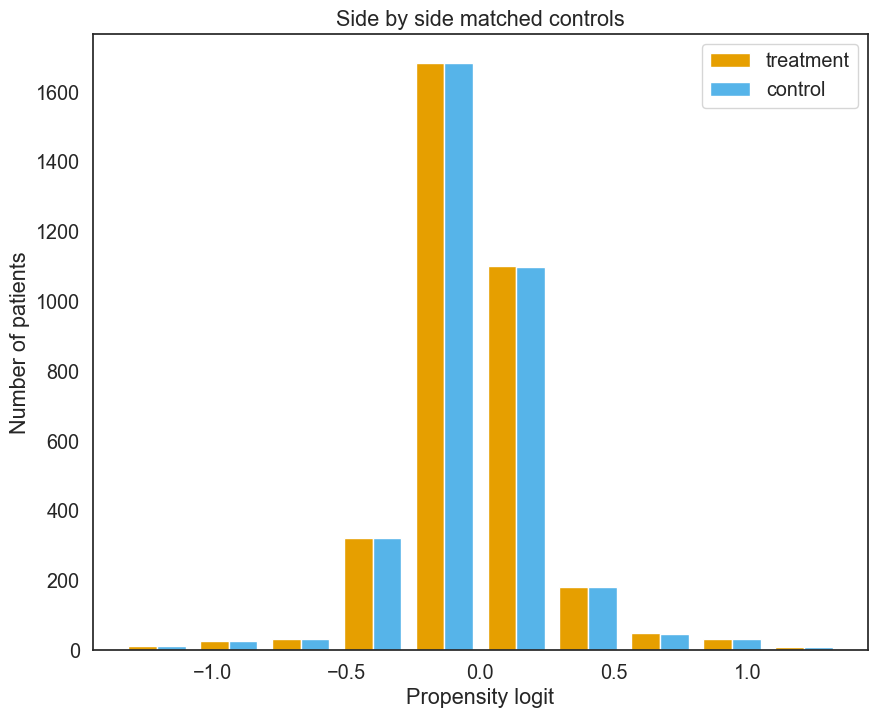

In [38]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

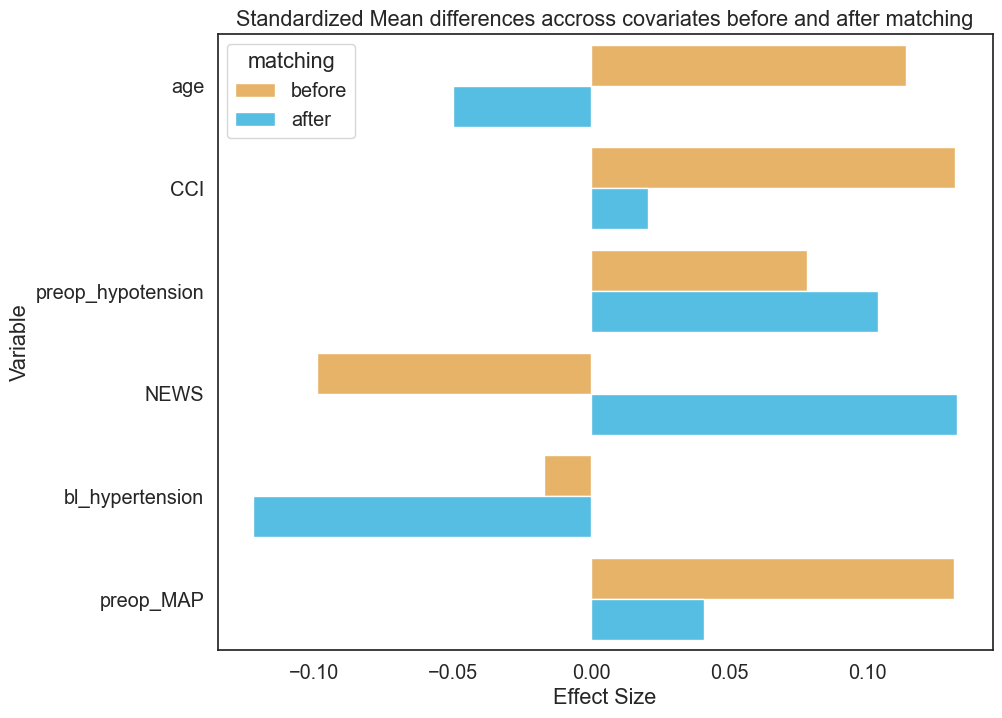

In [39]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [40]:
matched_df = psm.df_matched

In [41]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5  52.0    4                  0     2   
1  61033e00-e7cf-44a7-8c00-4a95bed78e23  74.0    0                  0     0   
2  d759b785-90b0-4a82-8696-ce12ef005d19  50.0    8                  0     0   
3  426b9fa5-02f6-409b-8510-fd2397b39baa  54.0    3                  0     3   
4  d4b94df1-83c7-4d47-921b-8e84b1a06984  76.0    4                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.482188         -0.071278        0  
1                0          0          0.524789          0.099236        0  
2                1          0          0.576266          0.307462        0  
3                1          0          0.454509         -0.182467        0  
4                0          0          0.598329          0.398508        0

In [42]:
matched_df.shape

(6876, 10)

## Matched Ids

In [43]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5  6a046aaa-0e78-492c-bd5a-333999ab4291
1  61033e00-e7cf-44a7-8c00-4a95bed78e23  41de3f97-6550-4527-af0c-c98f94281e14
2  d759b785-90b0-4a82-8696-ce12ef005d19  1cc7d990-b417-4f0d-b8e5-c95dade53237
3  426b9fa5-02f6-409b-8510-fd2397b39baa  06e81afb-12b0-454e-9802-f65f39823796
4  d4b94df1-83c7-4d47-921b-8e84b1a06984  b0855cbc-10f5-4da5-b166-a35c2d57cb83

## Effect sizes per variables

In [44]:
psm.effect_size

Variable matching  Effect Size
0                 age   before     0.113694
1                 age    after    -0.049672
2                 CCI   before     0.131543
3                 CCI    after     0.020581
4   preop_hypotension   before     0.078139
5   preop_hypotension    after     0.103864
6                NEWS   before    -0.099093
7                NEWS    after     0.132328
8     bl_hypertension   before    -0.016882
9     bl_hypertension    after    -0.122204
10          preop_MAP   before     0.131046
11          preop_MAP    after     0.040875

## Explore Matched df

In [45]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5  52.0    4                  0     2   
1  61033e00-e7cf-44a7-8c00-4a95bed78e23  74.0    0                  0     0   
2  d759b785-90b0-4a82-8696-ce12ef005d19  50.0    8                  0     0   
3  426b9fa5-02f6-409b-8510-fd2397b39baa  54.0    3                  0     3   
4  d4b94df1-83c7-4d47-921b-8e84b1a06984  76.0    4                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.482188         -0.071278        0  
1                0          0          0.524789          0.099236        0  
2                1          0          0.576266          0.307462        0  
3                1          0          0.454509         -0.182467        0  
4                0          0          0.598329          0.398508        0

In [46]:
matched_df.albumin.value_counts()

0    3438
1    3438
Name: albumin, dtype: int64

In [47]:
matched_df.shape

(6876, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [48]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [49]:
f_df.shape

(6876, 39)

In [50]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  f575e3fa-3377-4b25-85b8-c3f4f2c7a6e5  52.0    4                  0     2   
1  61033e00-e7cf-44a7-8c00-4a95bed78e23  74.0    0                  0     0   
2  d759b785-90b0-4a82-8696-ce12ef005d19  50.0    8                  0     0   
3  426b9fa5-02f6-409b-8510-fd2397b39baa  54.0    3                  0     3   
4  d4b94df1-83c7-4d47-921b-8e84b1a06984  76.0    4                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                1          0          0.482188         -0.071278        0   
1                0          0          0.524789          0.099236        0   
2                1          0          0.576266          0.307462        0   
3                1          0          0.454509         -0.182467        0   
4                0          0          0.598329          0.398508        0   

                               personid  pre_albumin  early_albumin  \
0  05d79015-bb4a-4aed-ac42-9da340ec2cf8            0              0   
1  0629a888-a248-4084-9e84-f77fd14dd513            0              0   
2  215cd2e7-cd41-4fbd-ab4b-417a31305158            0              0   
3  26124e81-86f8-4b43-a414-45d25a48a173            0              0   
4  266e20b1-6068-47f6-9618-664d33219efa            0              0   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             0    1  16.452083                 0                 1.0   
1             0    0   1.101389                 0                 0.0   
2             0    0   7.854861                 0                 0.0   
3             0    1   8.758924                 0                 1.0   
4             0    0   3.884722                 0                 0.0   

   hospital_free_days  vasopressor sex   race  postop_hypotension  MAKE_90  \
0                  46            0   M  White                   0        0   
1                  89            0   M  White                   1        0   
2                  81            0   F  White                   0        0   
3                  61            0   M  Other                   1        0   
4                  86            0   M  White                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            NaN                      Unknown             NaN        NaN   
1            NaN                      Unknown             NaN        NaN   
2            NaN                      Unknown             NaN        NaN   
3            NaN                      Unknown             NaN        NaN   
4            3.2                          Low             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown        NaN                  Unknown            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown       0.90                   Normal            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.63                   Normal            0   

   non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
0           1.0   96.555760                Normal    0       7.7   
1           1.0         NaN                   NaN    1       NaN   
2           1.0   74.554464  Early Kidney Disease    0      12.6   
3           1.0  106.988453                Normal    0       NaN   
4           1.0   95.725293                Normal    0      11.2   

  preop_hb_classification  open_pr  
0               7.0 - 7.9        1  
1                 Unknown        1  
2                  >= 9.0        1  
3                 Unknown        1  
4                  >= 9.0        1

In [51]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [52]:
f_df.albumin.value_counts()

0    3438
1    3438
Name: albumin, dtype: int64

In [53]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    333.000000
mean      13.702786
std       10.429686
min        0.975000
25%        7.787500
50%       11.021528
75%       15.280556
max       95.700694
Name: LOS_days, dtype: float64

In [54]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    6543.000000
mean       13.616768
std        14.682338
min         0.259028
25%         7.845833
50%        10.389352
75%        14.754167
max       384.789583
Name: LOS_days, dtype: float64

In [55]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [56]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    325
1      8
Name: 90_day_mortality, dtype: int64


In [57]:
mrate(m)

30 Day Mortality Rate (pct): 2.4024024024024024


In [58]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    6335
1     208
Name: 90_day_mortality, dtype: int64


In [59]:
mrate(m1)

30 Day Mortality Rate (pct): 3.178969891487086


In [60]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    210
1.0    115
Name: 90_day_readmission, dtype: int64


In [61]:
rrate(r)

30 Day Readmission Rate (pct): 35.38461538461539


In [62]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    4341
1.0    1994
Name: 90_day_readmission, dtype: int64


In [63]:
rrate(r1)

30 Day Readmission Rate (pct): 31.475927387529595


In [64]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [65]:
a_df['CCI'].describe()

count    3438.000000
mean        2.579407
std         2.081817
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: CCI, dtype: float64

In [66]:
na_df['CCI'].describe()

count    3438.000000
mean        2.536649
std         2.073208
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: CCI, dtype: float64

In [67]:
a_df['age'].describe()

count    3438.000000
mean       61.780686
std        15.024281
min         0.000000
25%        55.000000
50%        64.000000
75%        72.000000
max        88.000000
Name: age, dtype: float64

In [68]:
na_df['age'].describe()

count    3438.000000
mean       62.500873
std        13.953511
min         0.000000
25%        56.000000
50%        64.000000
75%        72.000000
max        87.000000
Name: age, dtype: float64

In [69]:
a_df['preop_hypotension'].value_counts()

0    3017
1     421
Name: preop_hypotension, dtype: int64

In [70]:
na_df['preop_hypotension'].value_counts()

0    3127
1     311
Name: preop_hypotension, dtype: int64

In [71]:
a_df['NEWS'].describe()

count    3438.000000
mean        2.394706
std         2.494065
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NEWS, dtype: float64

In [72]:
na_df['NEWS'].describe()

count    3438.000000
mean        2.083770
std         2.195949
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NEWS, dtype: float64

In [73]:
a_df['bl_hypertension'].value_counts()

1    2467
0     971
Name: bl_hypertension, dtype: int64

In [74]:
na_df['bl_hypertension'].value_counts()

1    2650
0     788
Name: bl_hypertension, dtype: int64

In [75]:
a_df['preop_MAP'].value_counts()

0    3313
1     125
Name: preop_MAP, dtype: int64

In [76]:
na_df['preop_MAP'].value_counts()

0    3338
1     100
Name: preop_MAP, dtype: int64

In [77]:
f_df.to_csv('cardiac_procedures_ps_matched_221018.csv', index=False)